## Google Drive Mount

- account: leeyeoreum01@gmail.com

In [1]:
from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Google Drive Working Directory Select

- csv_file_dir = 'tensorflow_2.x_working_dir'
- ipynb_file_dir = 'Colab Notebooks'

In [2]:
%tensorflow_version 1.x

import tensorflow as tf
import os
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


working_dir = 'tensorflow_2.x_working_dir'

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()

try:

  os.chdir(colab_default_dir)

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir)
  print("current dir = ", os.getcwd())

except Exception as err:
  
  os.chdir(original_dir)
  print(str(err))

TensorFlow 1.x selected.
current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


## File Upload From Google Drive Working Directory

- titanic_train.csv
- titanic_test.csv
- titanic_gender_submission.csv

In [3]:
try:
  
  train_df = pd.read_csv('./titanic_train.csv')
  test_df = pd.read_csv('./titanic_test.csv')

  print("train_df.shape = ", train_df.shape, ", test_df.shape = ", test_df.shape)

except Exception as err:
  
  print(str(err))

train_df.shape =  (891, 12) , test_df.shape =  (418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## CSV File Preprocessing

- Using row
> [ [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- transforming non_float data to float data ('Sex' row)
- processing missing data
> - 'Age' row -> mean value
> - 'Fare' row -> median value



In [6]:
print("[train_df.isnull().sum()]\n", train_df.isnull().sum())
print("\n\n[test_df.isnull().sum()]\n", test_df.isnull().sum())

[train_df.isnull().sum()]
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


[test_df.isnull().sum()]
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
train_df = train_df[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
test_df = test_df[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [9]:
print("[train_df.isnull().sum()]\n", train_df.isnull().sum())
print("\n\n[test_df.isnull().sum()]\n", test_df.isnull().sum())

[train_df.isnull().sum()]
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


[test_df.isnull().sum()]
 Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


In [10]:
train_df["Sex"] = train_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [11]:
test_df["Sex"] = test_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [12]:
print("train_df Age mean = ", train_df['Age'].mean())
print("train_df Age median = ", train_df['Age'].median())

print("\ntest_df Age mean = ", test_df['Age'].mean())
print("test_df Age median = ", test_df['Age'].median())
print("test_df Fare mean = ", train_df['Fare'].mean())
print("test_df Fare median = ", train_df['Fare'].median())

train_df Age mean =  29.69911764705882
train_df Age median =  28.0

test_df Age mean =  30.272590361445783
test_df Age median =  27.0
test_df Fare mean =  32.2042079685746
test_df Fare median =  14.4542


In [13]:
train_df['Age'].fillna(float(train_df['Age'].mean()), inplace=True)

print("[train_df.isnull().sum()]\n", train_df.isnull().sum(), "\n")

train_df

[train_df.isnull().sum()]
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [14]:
test_df['Age'].fillna(float(test_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

print("[test_df.isnull().sum()]\n", test_df.isnull().sum(), "\n")

test_df

[test_df.isnull().sum()]
 Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64 



,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.50000,0,0,7.8292
1,3,1,47.00000,1,0,7.0000
2,2,0,62.00000,0,0,9.6875
3,3,0,27.00000,0,0,8.6625
4,3,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500
414,1,1,39.00000,0,0,108.9000
415,3,0,38.50000,0,0,7.2500
416,3,0,30.27259,0,0,8.0500


## Data Generation

- train data : 63%
- validation data : 7%
- test data : 30%

- Normalization: True

In [15]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, file, seperation_rate, target_position=-1):
        
        self.file = file
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        loaded_data = self.file

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [16]:
# DataGeneration class 이용하여 training data , validation data, test data 생성

data = np.array(train_df)

data_obj = DataGeneration(data, seperation_rate=0.3, target_position=0)
(training_data, test_data) = data_obj.generate()

training_data_obj = DataGeneration(training_data, seperation_rate=0.1, target_position=0)
(training_data, validation_data) = training_data_obj.generate()

print("training_data.shape = ", training_data.shape)
print("validation_data.shape = ", validation_data.shape)
print("test_data.shape = ", test_data.shape)

[DataGeneration]  loaded_data.shape =  (891, 7)
[DataGeneration] unique number of original data =  0.0 , count =  549
[DataGeneration] unique number of original data =  1.0 , count =  342
[DataGeneration] unique number of original data =  0.0 , ratio =  61.62  %
[DataGeneration] unique number of original data =  1.0 , ratio =  38.38  %
[DataGeneration] unique number of training data =  0.0 , count =  383
[DataGeneration] unique number of training data =  1.0 , count =  241
[DataGeneration] unique number of training data =  0.0 , ratio =  61.38  %
[DataGeneration] unique number of training data =  1.0 , ratio =  38.62  %
[DataGeneration] unique number of test data =  0.0 , count =  166
[DataGeneration] unique number of test data =  1.0 , count =  101
[DataGeneration] unique number of test data =  0.0 , ratio =  62.17  %
[DataGeneration] unique number of test data =  1.0 , ratio =  37.83  %
[DataGeneration]  loaded_data.shape =  (624, 7)
[DataGeneration] unique number of original data = 

In [17]:
training_xdata = training_data[ :  , 1:]
training_tdata = training_data[ :  , [0]]

validation_xdata = validation_data[ :  , 1:]
validation_tdata = validation_data[ :  , [0]]

test_xdata = test_data[ :  , 1:]
test_tdata = test_data[ :  , [0]]

print("training_xdata = ", training_xdata.shape, ", training_tdata = ", training_tdata.shape)
print("validation_xdata = ", validation_xdata.shape, ", validation_tdata = ", validation_tdata.shape)
print("test_xdata = ", test_xdata.shape, ", test_tdata = ", test_tdata.shape)

training_xdata =  (562, 6) , training_tdata =  (562, 1)
validation_xdata =  (62, 6) , validation_tdata =  (62, 1)
test_xdata =  (267, 6) , test_tdata =  (267, 1)


In [18]:
# 정규화(Normalization) 코드

def data_normalization(data):
  
  try:

    if data.ndim != 2:
      raise Exception("Warning: input data must be 2 dim!!")

    for i in range(len(data)):
      for j in range(len(data[i])):
        data[i, j] = (data[i, j] - np.min(data)) / (np.max(data) - np.min(data))

    return data

  except Exception as err:
    raise Exception

try:
  data_normalization(training_xdata)
  data_normalization(validation_xdata)
  data_normalization(test_xdata)

except Exception as err:
  print(str(err))

In [19]:
training_xdata

array([[0.00585561, 0.00195187, 0.05796882, 0.01561496, 0.00390374,
        0.13575256],
       [0.00390374, 0.        , 0.07221919, 0.00195187, 0.        ,
        0.05074862],
       [0.00390374, 0.00195187, 0.03708553, 0.00195187, 0.        ,
        0.05074862],
       ...,
       [0.0375    , 0.        , 0.55      , 0.        , 0.0125    ,
        0.20125   ],
       [0.0125    , 0.        , 1.        , 0.        , 0.        ,
        0.96774194],
       [0.09677419, 0.03225806, 1.        , 0.        , 0.        ,
        1.        ]])

In [20]:
validation_xdata

array([[0.02244669, 0.        , 0.06734007, 0.03741115, 0.01496446,
        0.35091657],
       [0.02244669, 0.        , 0.19453797, 0.00748223, 0.        ,
        0.05876693],
       [0.02244669, 0.00748223, 0.33670034, 0.        , 0.        ,
        0.05798728],
       [0.02244669, 0.00748223, 0.01496446, 0.        , 0.00748223,
        0.0919379 ],
       [0.00748223, 0.        , 0.29180696, 0.        , 0.        ,
        0.        ],
       [0.01496446, 0.        , 0.14216236, 0.        , 0.        ,
        0.09726899],
       [0.02244669, 0.        , 0.37411149, 0.        , 0.        ,
        0.06023195],
       [0.02244669, 0.        , 0.22221562, 0.        , 0.        ,
        0.42271455],
       [0.02244669, 0.        , 0.21698466, 0.        , 0.        ,
        0.07095623],
       [0.02244669, 0.        , 0.26187804, 0.        , 0.        ,
        0.06023195],
       [0.02244669, 0.        , 0.22221562, 0.        , 0.        ,
        0.05798728],
       [0.02244669, 0

In [21]:
test_xdata

array([[0.00585561, 0.        , 0.08588228, 0.        , 0.        ,
        0.01571255],
       [0.00195187, 0.00195187, 0.09954537, 0.00195187, 0.        ,
        0.15216447],
       [0.00585561, 0.        , 0.0585561 , 0.        , 0.        ,
        0.01854277],
       ...,
       [0.01156069, 0.01156069, 0.1849711 , 0.        , 0.        ,
        1.        ],
       [0.08333333, 0.        , 0.61111111, 0.        , 0.        ,
        0.22361111],
       [0.02777778, 0.        , 1.        , 0.        , 0.        ,
        1.        ]])

## DNN Model 1


- number of hidden node = 1
----
- error = Cross Entropy
- optimizer = Gradient Descent
----
- loss value trend method = True
- accuracy value trend method = True

In [22]:
class Model1:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

## M1obj_1 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 10

In [50]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 10

In [51]:
M1obj_1 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_1.X
T = M1obj_1.T
y = M1obj_1.y

loss = M1obj_1.loss_val()

train = M1obj_1.train()

In [52]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [53]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  0.7245419
epochs =  0 , step =  56 , loss_val =  0.60889006
epochs =  0 , step =  112 , loss_val =  0.5968731
epochs =  0 , step =  168 , loss_val =  0.5786266
epochs =  0 , step =  224 , loss_val =  0.551608
epochs =  0 , step =  280 , loss_val =  0.5193685
epochs =  0 , step =  336 , loss_val =  0.48973367
epochs =  0 , step =  392 , loss_val =  0.46960402
epochs =  0 , step =  448 , loss_val =  0.45516083
epochs =  0 , step =  504 , loss_val =  0.44818258
epochs =  0 , step =  560 , loss_val =  0.44509748
epochs =  1 , step =  0 , loss_val =  0.44499406
epochs =  1 , step =  56 , loss_val =  0.44340464
epochs =  1 , step =  112 , loss_val =  0.44191766
epochs =  1 , step =  168 , loss_val =  0.44330612
epochs =  1 , step =  224 , loss_val =  0.43973926
epochs =  1 , step =  280 , loss_val =  0.43852663
epochs =  1 , step =  336 , loss_val =  0.4414479
epochs =  1 , step =  392 , loss_val =  0.43572292
epochs =  1 , step =  448 , loss_val =  0.43

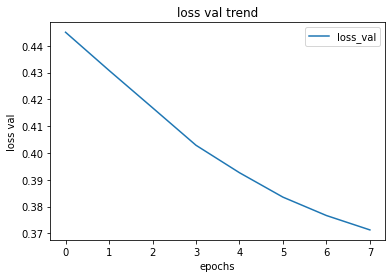

In [54]:
M1obj_1.loss_val_trend(epochs, loss_val_list)

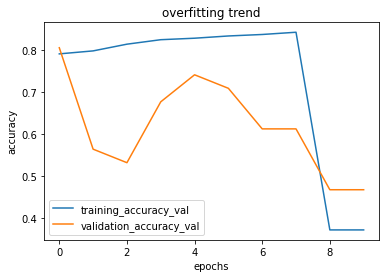

In [55]:
M1obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M1obj_2 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 80
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 100


In [29]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 80
output_nodes = 1

learning_rate = 1e-1
epochs = 100

In [30]:
M1obj_2 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_2.X
T = M1obj_2.T
y = M1obj_2.y

loss = M1obj_2.loss_val()

train = M1obj_2.train()

In [31]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [32]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  1.3879373
epochs =  0 , step =  56 , loss_val =  0.56147367
epochs =  0 , step =  112 , loss_val =  0.55411893
epochs =  0 , step =  168 , loss_val =  0.5491169
epochs =  0 , step =  224 , loss_val =  0.5432241
epochs =  0 , step =  280 , loss_val =  0.53790075
epochs =  0 , step =  336 , loss_val =  0.5317721
epochs =  0 , step =  392 , loss_val =  0.516529
epochs =  0 , step =  448 , loss_val =  0.5289449
epochs =  0 , step =  504 , loss_val =  0.5419434
epochs =  0 , step =  560 , loss_val =  0.5372304
epochs =  1 , step =  0 , loss_val =  0.50666416
epochs =  1 , step =  56 , loss_val =  0.50293005
epochs =  1 , step =  112 , loss_val =  0.4970733
epochs =  1 , step =  168 , loss_val =  0.5746855
epochs =  1 , step =  224 , loss_val =  0.48556563
epochs =  1 , step =  280 , loss_val =  0.48867288
epochs =  1 , step =  336 , loss_val =  0.48112237
epochs =  1 , step =  392 , loss_val =  0.5039346
epochs =  1 , step =  448 , loss_val =  0.5601656

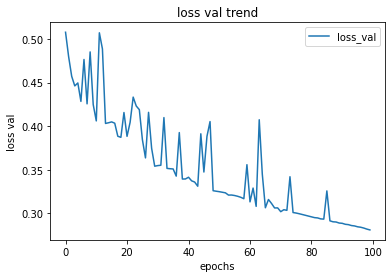

In [33]:
M1obj_2.loss_val_trend(epochs, loss_val_list)

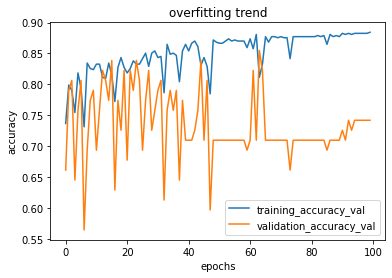

In [34]:
M1obj_2.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M1obj_3 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 50
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 70

In [35]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 50
output_nodes = 1

learning_rate = 1e-1
epochs = 70

In [36]:
M1obj_3 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_3.X
T = M1obj_3.T
y = M1obj_3.y

loss = M1obj_3.loss_val()

train = M1obj_3.train()

In [37]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [38]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  3.7563877
epochs =  0 , step =  56 , loss_val =  0.5760981
epochs =  0 , step =  112 , loss_val =  0.5471891
epochs =  0 , step =  168 , loss_val =  0.5428507
epochs =  0 , step =  224 , loss_val =  0.5338238
epochs =  0 , step =  280 , loss_val =  0.529435
epochs =  0 , step =  336 , loss_val =  0.52360505
epochs =  0 , step =  392 , loss_val =  0.5184887
epochs =  0 , step =  448 , loss_val =  0.51164824
epochs =  0 , step =  504 , loss_val =  0.5029026
epochs =  0 , step =  560 , loss_val =  0.54283845
epochs =  1 , step =  0 , loss_val =  0.5253128
epochs =  1 , step =  56 , loss_val =  0.48826376
epochs =  1 , step =  112 , loss_val =  0.48882568
epochs =  1 , step =  168 , loss_val =  0.47566766
epochs =  1 , step =  224 , loss_val =  0.4723855
epochs =  1 , step =  280 , loss_val =  0.49844986
epochs =  1 , step =  336 , loss_val =  0.4678015
epochs =  1 , step =  392 , loss_val =  0.47330582
epochs =  1 , step =  448 , loss_val =  0.464253


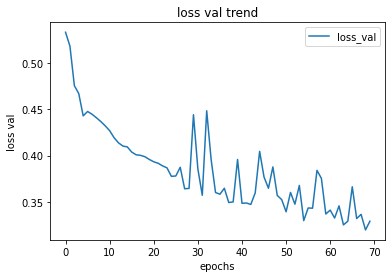

In [39]:
M1obj_3.loss_val_trend(epochs, loss_val_list)

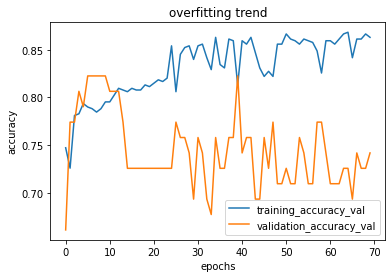

In [40]:
M1obj_3.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M1obj_4 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 50
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 100

In [41]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 50
output_nodes = 1

learning_rate = 1e-2
epochs = 100

In [42]:
M1obj_4 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_4.X
T = M1obj_4.T
y = M1obj_4.y

loss = M1obj_4.loss_val()

train = M1obj_4.train()

In [43]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [44]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  2.0670202
epochs =  0 , step =  56 , loss_val =  0.6852131
epochs =  0 , step =  112 , loss_val =  0.6261475
epochs =  0 , step =  168 , loss_val =  0.6061469
epochs =  0 , step =  224 , loss_val =  0.5923254
epochs =  0 , step =  280 , loss_val =  0.5848077
epochs =  0 , step =  336 , loss_val =  0.57982695
epochs =  0 , step =  392 , loss_val =  0.57608086
epochs =  0 , step =  448 , loss_val =  0.5730727
epochs =  0 , step =  504 , loss_val =  0.5704864
epochs =  0 , step =  560 , loss_val =  0.5681364
epochs =  1 , step =  0 , loss_val =  0.56805617
epochs =  1 , step =  56 , loss_val =  0.5659244
epochs =  1 , step =  112 , loss_val =  0.5639904
epochs =  1 , step =  168 , loss_val =  0.5620948
epochs =  1 , step =  224 , loss_val =  0.560087
epochs =  1 , step =  280 , loss_val =  0.55842525
epochs =  1 , step =  336 , loss_val =  0.5568258
epochs =  1 , step =  392 , loss_val =  0.55524796
epochs =  1 , step =  448 , loss_val =  0.5536724
ep

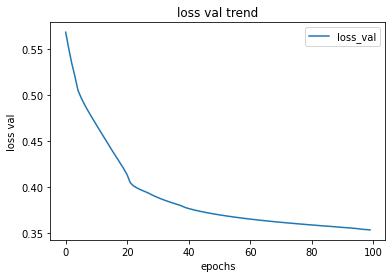

In [45]:
M1obj_4.loss_val_trend(epochs, loss_val_list)

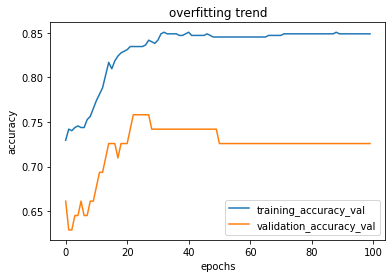

In [46]:
M1obj_4.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M1obj_5 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 100

In [47]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-2
epochs = 100

In [48]:
M1obj_5 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_5.X
T = M1obj_5.T
y = M1obj_5.y

loss = M1obj_5.loss_val()

train = obj6.train()

In [49]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [50]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  1.8084601
epochs =  0 , step =  56 , loss_val =  0.6419272
epochs =  0 , step =  112 , loss_val =  0.56834817
epochs =  0 , step =  168 , loss_val =  0.55450696
epochs =  0 , step =  224 , loss_val =  0.544697
epochs =  0 , step =  280 , loss_val =  0.5344173
epochs =  0 , step =  336 , loss_val =  0.5288762
epochs =  0 , step =  392 , loss_val =  0.52560985
epochs =  0 , step =  448 , loss_val =  0.52304864
epochs =  0 , step =  504 , loss_val =  0.52082837
epochs =  0 , step =  560 , loss_val =  0.5188357
epochs =  1 , step =  0 , loss_val =  0.51876277
epochs =  1 , step =  56 , loss_val =  0.5166373
epochs =  1 , step =  112 , loss_val =  0.51500636
epochs =  1 , step =  168 , loss_val =  0.5136087
epochs =  1 , step =  224 , loss_val =  0.51227844
epochs =  1 , step =  280 , loss_val =  0.5109746
epochs =  1 , step =  336 , loss_val =  0.50973296
epochs =  1 , step =  392 , loss_val =  0.5085518
epochs =  1 , step =  448 , loss_val =  0.507412

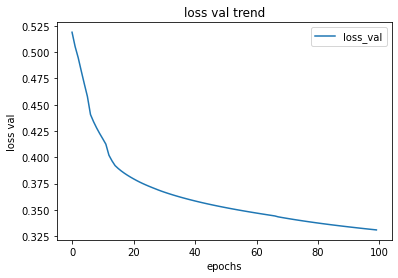

In [51]:
M1obj_5.loss_val_trend(epochs, loss_val_list)

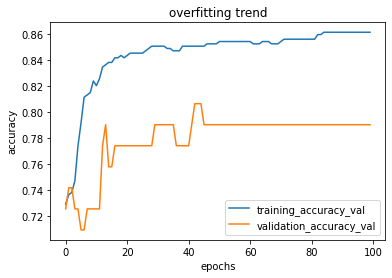

In [52]:
M1obj_5.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M1obj_6 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 100

In [53]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 100

In [54]:
M1obj_6 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_6.X
T = M1obj_6.T
y = M1obj_6.y

loss = M1obj_6.loss_val()

train = M1obj_6.train()

In [55]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [56]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  4.1942115
epochs =  0 , step =  56 , loss_val =  0.5451243
epochs =  0 , step =  112 , loss_val =  0.5382771
epochs =  0 , step =  168 , loss_val =  0.525145
epochs =  0 , step =  224 , loss_val =  0.5210718
epochs =  0 , step =  280 , loss_val =  0.513282
epochs =  0 , step =  336 , loss_val =  0.50839025
epochs =  0 , step =  392 , loss_val =  0.50540495
epochs =  0 , step =  448 , loss_val =  0.5026446
epochs =  0 , step =  504 , loss_val =  0.5052857
epochs =  0 , step =  560 , loss_val =  0.50249994
epochs =  1 , step =  0 , loss_val =  0.4907025
epochs =  1 , step =  56 , loss_val =  0.4892549
epochs =  1 , step =  112 , loss_val =  0.49723583
epochs =  1 , step =  168 , loss_val =  0.49646068
epochs =  1 , step =  224 , loss_val =  0.4898408
epochs =  1 , step =  280 , loss_val =  0.48748654
epochs =  1 , step =  336 , loss_val =  0.48459145
epochs =  1 , step =  392 , loss_val =  0.4978061
epochs =  1 , step =  448 , loss_val =  0.4706975
e

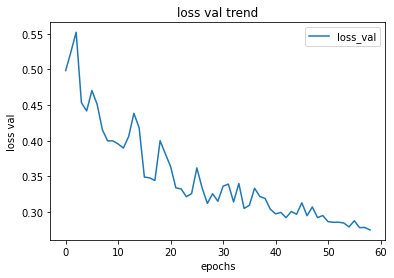

In [57]:
M1obj_6.loss_val_trend(epochs, loss_val_list)

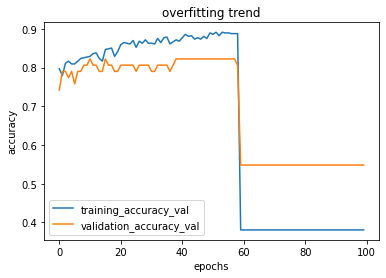

In [58]:
M1obj_6.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M1obj_7 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 20

In [44]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 20

In [45]:
M1obj_7 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_7.X
T = M1obj_7.T
y = M1obj_7.y

loss = M1obj_7.loss_val()

train = M1obj_7.train()

In [46]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [47]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  1.3686932
epochs =  0 , step =  56 , loss_val =  0.6020236
epochs =  0 , step =  112 , loss_val =  0.5803761
epochs =  0 , step =  168 , loss_val =  0.5579236
epochs =  0 , step =  224 , loss_val =  0.5309091
epochs =  0 , step =  280 , loss_val =  0.5016842
epochs =  0 , step =  336 , loss_val =  0.47393343
epochs =  0 , step =  392 , loss_val =  0.4557501
epochs =  0 , step =  448 , loss_val =  0.45003352
epochs =  0 , step =  504 , loss_val =  0.44561172
epochs =  0 , step =  560 , loss_val =  0.463109
epochs =  1 , step =  0 , loss_val =  0.46482974
epochs =  1 , step =  56 , loss_val =  0.44421583
epochs =  1 , step =  112 , loss_val =  0.4449731
epochs =  1 , step =  168 , loss_val =  0.44370613
epochs =  1 , step =  224 , loss_val =  0.44513857
epochs =  1 , step =  280 , loss_val =  0.44304663
epochs =  1 , step =  336 , loss_val =  0.44731265
epochs =  1 , step =  392 , loss_val =  0.44238585
epochs =  1 , step =  448 , loss_val =  0.44798

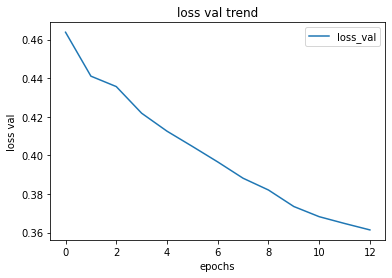

In [48]:
M1obj_7.loss_val_trend(epochs, loss_val_list)

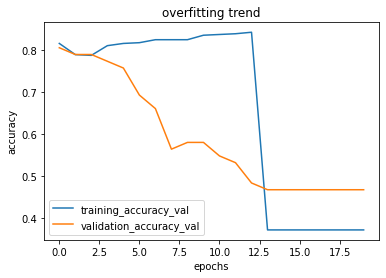

In [49]:
M1obj_7.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## DNN Model 2


- number of hidden node = 1
----
- error = Cross Entropy
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [22]:
class Model2:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

## M2obj_1 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 100

In [35]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-2
epochs = 100

In [36]:
M2obj_1 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_1.X
T = M2obj_1.T
y = M2obj_1.y

loss = M2obj_1.loss_val()

train = M2obj_1.train()

In [37]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [39]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  1.0548
epochs =  0 , step =  56 , loss_val =  0.63996273
epochs =  0 , step =  112 , loss_val =  0.6313952
epochs =  0 , step =  168 , loss_val =  0.62375957
epochs =  0 , step =  224 , loss_val =  0.6159391
epochs =  0 , step =  280 , loss_val =  0.60788625
epochs =  0 , step =  336 , loss_val =  0.5999664
epochs =  0 , step =  392 , loss_val =  0.59277046
epochs =  0 , step =  448 , loss_val =  0.58666784
epochs =  0 , step =  504 , loss_val =  0.5816201
epochs =  0 , step =  560 , loss_val =  0.5773107
epochs =  1 , step =  0 , loss_val =  0.5771657
epochs =  1 , step =  56 , loss_val =  0.5732453
epochs =  1 , step =  112 , loss_val =  0.5694416
epochs =  1 , step =  168 , loss_val =  0.56562966


KeyboardInterrupt: ignored

In [ ]:
M2obj_1.loss_val_trend(epochs, loss_val_list)

In [ ]:
M2obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M2obj_2 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 50

In [40]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-3
epochs = 50

In [41]:
M2obj_2 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_2.X
T = M2obj_2.T
y = M2obj_2.y

loss = M2obj_2.loss_val()

train = M2obj_2.train()

In [42]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [43]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  2.1503406
epochs =  0 , step =  56 , loss_val =  1.8442962
epochs =  0 , step =  112 , loss_val =  1.5508173
epochs =  0 , step =  168 , loss_val =  1.2769258
epochs =  0 , step =  224 , loss_val =  1.0381073
epochs =  0 , step =  280 , loss_val =  0.8555367
epochs =  0 , step =  336 , loss_val =  0.74235266
epochs =  0 , step =  392 , loss_val =  0.68862385
epochs =  0 , step =  448 , loss_val =  0.6691052
epochs =  0 , step =  504 , loss_val =  0.6632562
epochs =  0 , step =  560 , loss_val =  0.66145235
epochs =  1 , step =  0 , loss_val =  0.66141325
epochs =  1 , step =  56 , loss_val =  0.6605586
epochs =  1 , step =  112 , loss_val =  0.6598648
epochs =  1 , step =  168 , loss_val =  0.6591908
epochs =  1 , step =  224 , loss_val =  0.65851563
epochs =  1 , step =  280 , loss_val =  0.6578387
epochs =  1 , step =  336 , loss_val =  0.6571621
epochs =  1 , step =  392 , loss_val =  0.65648764
epochs =  1 , step =  448 , loss_val =  0.65581757

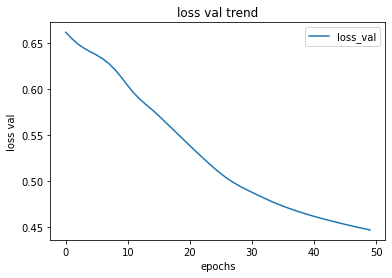

In [44]:
M2obj_2.loss_val_trend(epochs, loss_val_list)

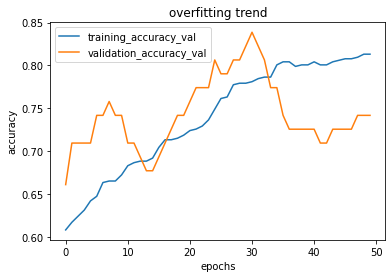

In [45]:
M2obj_2.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M2obj_3 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 30

In [29]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-3
epochs = 30

In [30]:
M2obj_3 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_3.X
T = M2obj_3.T
y = M2obj_3.y

loss = M2obj_3.loss_val()

train = M2obj_3.train()

In [31]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [32]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  nan
epochs =  0 , step =  56 , loss_val =  nan
epochs =  0 , step =  112 , loss_val =  nan
epochs =  0 , step =  168 , loss_val =  nan
epochs =  0 , step =  224 , loss_val =  nan
epochs =  0 , step =  280 , loss_val =  nan
epochs =  0 , step =  336 , loss_val =  nan
epochs =  0 , step =  392 , loss_val =  nan
epochs =  0 , step =  448 , loss_val =  nan
epochs =  0 , step =  504 , loss_val =  nan
epochs =  0 , step =  560 , loss_val =  nan
epochs =  1 , step =  0 , loss_val =  nan
epochs =  1 , step =  56 , loss_val =  nan
epochs =  1 , step =  112 , loss_val =  nan
epochs =  1 , step =  168 , loss_val =  nan
epochs =  1 , step =  224 , loss_val =  nan
epochs =  1 , step =  280 , loss_val =  nan
epochs =  1 , step =  336 , loss_val =  nan
epochs =  1 , step =  392 , loss_val =  nan
epochs =  1 , step =  448 , loss_val =  nan
epochs =  1 , step =  504 , loss_val =  nan
epochs =  1 , step =  560 , loss_val =  nan
epochs =  2 , step =  0 , loss_val =  

KeyboardInterrupt: ignored

In [ ]:
M2obj_3.loss_val_trend(epochs, loss_val_list)

In [ ]:
M2obj_3.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M2obj_4 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 40

In [29]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-3
epochs = 40

In [30]:
M2obj_4 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_4.X
T = M2obj_4.T
y = M2obj_4.y

loss = M2obj_4.loss_val()

train = M2obj_4.train()

In [31]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [32]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  0.676192
epochs =  0 , step =  56 , loss_val =  0.66006655
epochs =  0 , step =  112 , loss_val =  0.6584105
epochs =  0 , step =  168 , loss_val =  0.6570576
epochs =  0 , step =  224 , loss_val =  0.6557852
epochs =  0 , step =  280 , loss_val =  0.6545751
epochs =  0 , step =  336 , loss_val =  0.65342087
epochs =  0 , step =  392 , loss_val =  0.6523184
epochs =  0 , step =  448 , loss_val =  0.65126455
epochs =  0 , step =  504 , loss_val =  0.6502562
epochs =  0 , step =  560 , loss_val =  0.6492907
epochs =  1 , step =  0 , loss_val =  0.64925694
epochs =  1 , step =  56 , loss_val =  0.64833283
epochs =  1 , step =  112 , loss_val =  0.6474463
epochs =  1 , step =  168 , loss_val =  0.64659506
epochs =  1 , step =  224 , loss_val =  0.64577705
epochs =  1 , step =  280 , loss_val =  0.64499044
epochs =  1 , step =  336 , loss_val =  0.6442335
epochs =  1 , step =  392 , loss_val =  0.6435045
epochs =  1 , step =  448 , loss_val =  0.6428017

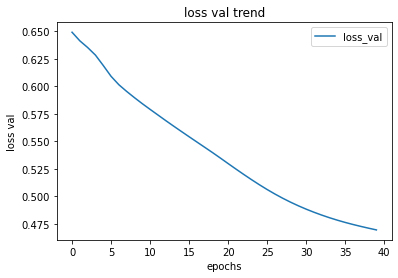

In [33]:
M2obj_4.loss_val_trend(epochs, loss_val_list)

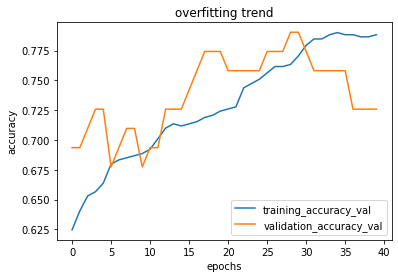

In [34]:
M2obj_4.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M2obj_5 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 100

In [23]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-3
epochs = 100

In [24]:
M2obj_5 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_5.X
T = M2obj_5.T
y = M2obj_5.y

loss = M2obj_5.loss_val()

train = M2obj_5.train()

In [25]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [26]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  0.7845039
epochs =  0 , step =  56 , loss_val =  0.7199403
epochs =  0 , step =  112 , loss_val =  0.68641365
epochs =  0 , step =  168 , loss_val =  0.6733497
epochs =  0 , step =  224 , loss_val =  0.66924286
epochs =  0 , step =  280 , loss_val =  0.66772705
epochs =  0 , step =  336 , loss_val =  0.66669863
epochs =  0 , step =  392 , loss_val =  0.66572666
epochs =  0 , step =  448 , loss_val =  0.6647586
epochs =  0 , step =  504 , loss_val =  0.6637955
epochs =  0 , step =  560 , loss_val =  0.6628417
epochs =  1 , step =  0 , loss_val =  0.66280794
epochs =  1 , step =  56 , loss_val =  0.6618675
epochs =  1 , step =  112 , loss_val =  0.66094255
epochs =  1 , step =  168 , loss_val =  0.6600346
epochs =  1 , step =  224 , loss_val =  0.6591447
epochs =  1 , step =  280 , loss_val =  0.6582732
epochs =  1 , step =  336 , loss_val =  0.65742034
epochs =  1 , step =  392 , loss_val =  0.656586
epochs =  1 , step =  448 , loss_val =  0.6557699

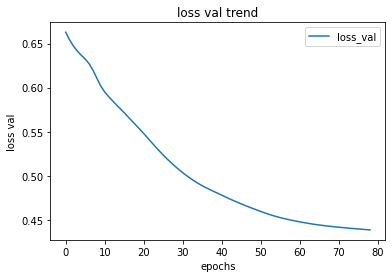

In [27]:
M2obj_5.loss_val_trend(epochs, loss_val_list)

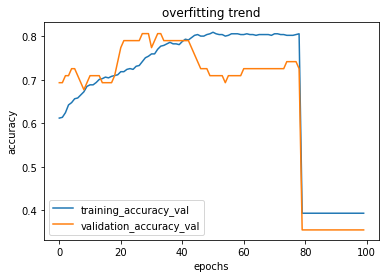

In [28]:
M2obj_5.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## DNN Model 3


- number of hidden node = 2
----
- error = Cross Entropy
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [46]:
class Model3:

  def __init__(self, learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_1_nodes = hidden_1_nodes
    self.hidden_2_nodes = hidden_2_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_1_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_1_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_1_nodes, self.hidden_2_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.hidden_2_nodes]))     # 바이어스 노드

    self.W4 = tf.Variable(tf.random_normal([self.hidden_2_nodes, self.output_nodes]))
    self.b4 = tf.Variable(tf.random_normal([self.output_nodes]))

    self.Z2 = tf.matmul(self.X, self.W2) + self.b2
    self.A2 = tf.sigmoid(self.Z2)

    self.Z3 = tf.matmul(self.A2, self.W3) + self.b3
    self.A3 = tf.sigmoid(self.Z3)

    self.Z4 = tf.matmul(self.A3, self.W4) + self.b4
    self.A4 = self.y = tf.sigmoid(self.Z4)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

## M3obj_1 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 30

In [47]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 30

In [48]:
M3obj_1 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_1.X
T = M3obj_1.T
y = M3obj_1.y

loss = M3obj_1.loss_val()

train = M3obj_1.train()

In [49]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [50]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  0.6854042
epochs =  0 , step =  56 , loss_val =  0.65996724
epochs =  0 , step =  112 , loss_val =  0.6013807
epochs =  0 , step =  168 , loss_val =  0.5711791
epochs =  0 , step =  224 , loss_val =  0.53570515
epochs =  0 , step =  280 , loss_val =  0.5091096
epochs =  0 , step =  336 , loss_val =  0.49432427
epochs =  0 , step =  392 , loss_val =  0.4771064
epochs =  0 , step =  448 , loss_val =  0.46709538
epochs =  0 , step =  504 , loss_val =  0.45761737
epochs =  0 , step =  560 , loss_val =  0.44620332
epochs =  1 , step =  0 , loss_val =  0.44572434
epochs =  1 , step =  56 , loss_val =  0.43747848
epochs =  1 , step =  112 , loss_val =  0.43361628
epochs =  1 , step =  168 , loss_val =  0.42773253
epochs =  1 , step =  224 , loss_val =  0.43275142
epochs =  1 , step =  280 , loss_val =  0.41758388
epochs =  1 , step =  336 , loss_val =  0.41616425
epochs =  1 , step =  392 , loss_val =  0.4104476
epochs =  1 , step =  448 , loss_val =  0.4

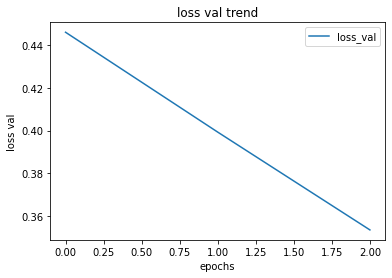

In [51]:
M3obj_1.loss_val_trend(epochs, loss_val_list)

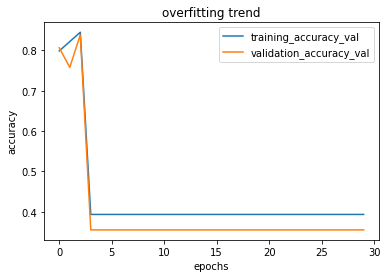

In [52]:
M3obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M3obj_2 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 30

In [53]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-2
epochs = 30

In [54]:
M3obj_2 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_2.X
T = M3obj_2.T
y = M3obj_2.y

loss = M3obj_2.loss_val()

train = M3obj_2.train()

In [55]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [56]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  0.7550949
epochs =  0 , step =  56 , loss_val =  0.6461459
epochs =  0 , step =  112 , loss_val =  0.63341033
epochs =  0 , step =  168 , loss_val =  0.62142515
epochs =  0 , step =  224 , loss_val =  0.61078584
epochs =  0 , step =  280 , loss_val =  0.60155433
epochs =  0 , step =  336 , loss_val =  0.5924484
epochs =  0 , step =  392 , loss_val =  0.58092296
epochs =  0 , step =  448 , loss_val =  0.570005
epochs =  0 , step =  504 , loss_val =  0.5588797
epochs =  0 , step =  560 , loss_val =  0.5479785
epochs =  1 , step =  0 , loss_val =  0.54763013
epochs =  1 , step =  56 , loss_val =  0.5376126
epochs =  1 , step =  112 , loss_val =  0.5286341
epochs =  1 , step =  168 , loss_val =  0.5208172
epochs =  1 , step =  224 , loss_val =  0.5143828
epochs =  1 , step =  280 , loss_val =  0.508839
epochs =  1 , step =  336 , loss_val =  0.50625074
epochs =  1 , step =  392 , loss_val =  0.50117916
epochs =  1 , step =  448 , loss_val =  0.4984411


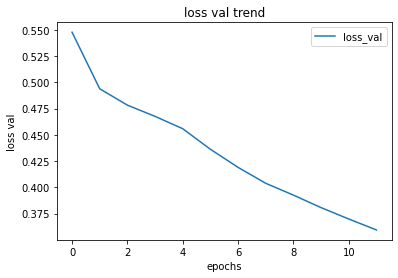

In [57]:
M3obj_2.loss_val_trend(epochs, loss_val_list)

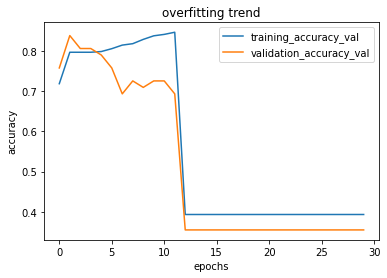

In [58]:
M3obj_2.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## M3obj_3 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 10
- hidden 2 nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 30

In [59]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 10
hidden_2_nodes = 10
output_nodes = 1

learning_rate = 1e-3
epochs = 30

In [60]:
M3obj_3 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_3.X
T = M3obj_3.T
y = M3obj_3.y

loss = M3obj_3.loss_val()

train = M3obj_3.train()

In [61]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [62]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  0.75155604
epochs =  0 , step =  56 , loss_val =  0.6763244
epochs =  0 , step =  112 , loss_val =  0.67426884
epochs =  0 , step =  168 , loss_val =  0.67319953
epochs =  0 , step =  224 , loss_val =  0.6721438
epochs =  0 , step =  280 , loss_val =  0.6710567
epochs =  0 , step =  336 , loss_val =  0.66989565
epochs =  0 , step =  392 , loss_val =  0.66861194
epochs =  0 , step =  448 , loss_val =  0.6671524
epochs =  0 , step =  504 , loss_val =  0.6654683
epochs =  0 , step =  560 , loss_val =  0.6635318
epochs =  1 , step =  0 , loss_val =  0.66345793
epochs =  1 , step =  56 , loss_val =  0.6612751
epochs =  1 , step =  112 , loss_val =  0.6589212
epochs =  1 , step =  168 , loss_val =  0.6564973
epochs =  1 , step =  224 , loss_val =  0.6541033
epochs =  1 , step =  280 , loss_val =  0.65180624
epochs =  1 , step =  336 , loss_val =  0.64962924
epochs =  1 , step =  392 , loss_val =  0.64755833
epochs =  1 , step =  448 , loss_val =  0.64554

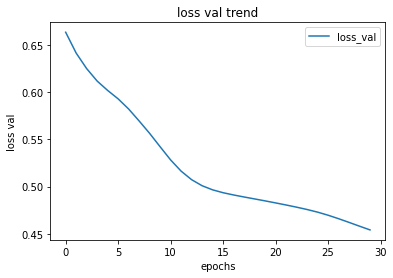

In [63]:
M3obj_3.loss_val_trend(epochs, loss_val_list)

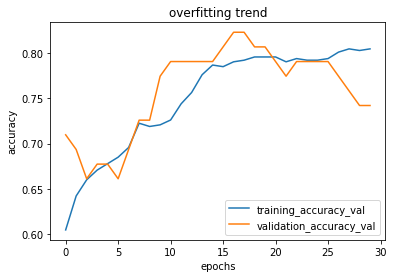

In [64]:
M3obj_3.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## DNN Model 4


- number of hidden node = 1
----
- error = MSE
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [67]:
class Model4:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def loss_val(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

## M4obj_1 (DNN Model 4, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 100

In [68]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 100

In [70]:
M4obj_1 = Model4(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M4obj_1.X
T = M4obj_1.T
y = M4obj_1.y

loss = M4obj_1.loss_val()

train = M4obj_1.train()

In [71]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [72]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  0.60591173
epochs =  0 , step =  56 , loss_val =  0.39323843
epochs =  0 , step =  112 , loss_val =  0.39323843
epochs =  0 , step =  168 , loss_val =  0.39323843
epochs =  0 , step =  224 , loss_val =  0.39323843
epochs =  0 , step =  280 , loss_val =  0.39323843
epochs =  0 , step =  336 , loss_val =  0.39323843
epochs =  0 , step =  392 , loss_val =  0.39323843
epochs =  0 , step =  448 , loss_val =  0.39323843
epochs =  0 , step =  504 , loss_val =  0.39323843
epochs =  0 , step =  560 , loss_val =  0.39323843
epochs =  1 , step =  0 , loss_val =  0.39323843
epochs =  1 , step =  56 , loss_val =  0.39323843
epochs =  1 , step =  112 , loss_val =  0.39323843
epochs =  1 , step =  168 , loss_val =  0.39323843
epochs =  1 , step =  224 , loss_val =  0.39323843
epochs =  1 , step =  280 , loss_val =  0.39323843
epochs =  1 , step =  336 , loss_val =  0.39323843
epochs =  1 , step =  392 , loss_val =  0.39323843
epochs =  1 , step =  448 , loss_val 

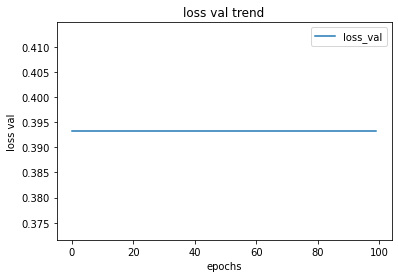

In [73]:
M4obj_1.loss_val_trend(epochs, loss_val_list)

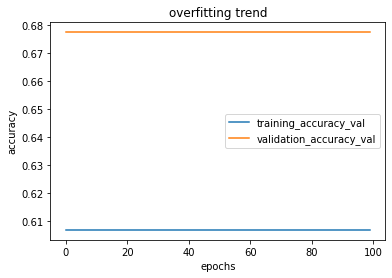

In [74]:
M4obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

## DNN Model 5


- number of hidden node = 1
----
- error = MSE
- optimizer = Gredient Descent
----
- loss value trend method = True
- accuracy value trend method = True

In [77]:
class Model5:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate)

  def __feed_forward(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def loss_val(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

## M5obj_1 (DNN Model 5, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 30

In [78]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 30

In [79]:
M5obj_1 = Model5(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M5obj_1.X
T = M5obj_1.T
y = M5obj_1.y

loss = M5obj_1.loss_val()

train = M5obj_1.train()

In [80]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

In [81]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})

  print("\nAccuracy = ", accuracy_val)

epochs =  0 , step =  0 , loss_val =  0.4733024
epochs =  0 , step =  56 , loss_val =  0.22856058
epochs =  0 , step =  112 , loss_val =  0.22834788
epochs =  0 , step =  168 , loss_val =  0.22814344
epochs =  0 , step =  224 , loss_val =  0.22794689
epochs =  0 , step =  280 , loss_val =  0.2277579
epochs =  0 , step =  336 , loss_val =  0.22757606
epochs =  0 , step =  392 , loss_val =  0.22740108
epochs =  0 , step =  448 , loss_val =  0.22723259
epochs =  0 , step =  504 , loss_val =  0.22707035
epochs =  0 , step =  560 , loss_val =  0.22691397
epochs =  1 , step =  0 , loss_val =  0.22690852
epochs =  1 , step =  56 , loss_val =  0.22675802
epochs =  1 , step =  112 , loss_val =  0.22661287
epochs =  1 , step =  168 , loss_val =  0.22647282
epochs =  1 , step =  224 , loss_val =  0.22633769
epochs =  1 , step =  280 , loss_val =  0.22620718
epochs =  1 , step =  336 , loss_val =  0.22608113
epochs =  1 , step =  392 , loss_val =  0.22595932
epochs =  1 , step =  448 , loss_val = 

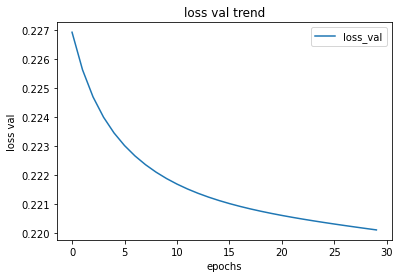

In [82]:
M5obj_1.loss_val_trend(epochs, loss_val_list)

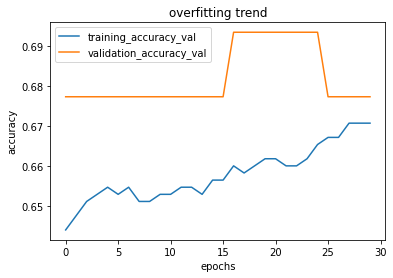

In [83]:
M5obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)